In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> Importing necessary libraries



In [3]:
import pandas as pd
import nltk

!pip install vaderSentiment
nltk.download('vader_lexicon')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 


     |████████████████████████████████| 133kB 4.2MB/s 
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [4]:
# Read preprocessed(cleaned) data file
vader= pd.read_csv('/content/Preprocessed data.csv', encoding= 'latin1')

> Dropping unnecessary columns.

In [5]:
vader = vader.drop('text', axis=1)
vader = vader.drop('text_modified', axis=1)
vader = vader.drop('joined_string', axis=1)


>The VADER algorithm outputs probability scores for the 3 
classes. 

>Compound (i.e aggregated score) is like an activation function giving a final score between [-1,1]. the function uses feature score instead of probabilities.





In [6]:
analyzer = SentimentIntensityAnalyzer()
vader['compound'] = [analyzer.polarity_scores(x)['compound'] for x in vader['lemmatized']]
vader['neg'] = [analyzer.polarity_scores(x)['neg'] for x in vader['lemmatized']]
vader['neu'] = [analyzer.polarity_scores(x)['neu'] for x in vader['lemmatized']]
vader['pos'] = [analyzer.polarity_scores(x)['pos'] for x in vader['lemmatized']]


Mapping compound values to 3 classes.

In [7]:
score=vader['compound'].values
t=[]
for i in score:
    if i >=0.05 :
        t.append('Positive')
    elif i<=-0.05 :
        t.append('Negative')
    else:
        t.append('Neutral')
vader['Sentiment']=t
 


,tweet_id,Full_text,tweet_timestamp,user_location,date,time,text_length,tokens,No_stopwords,lemmatized,compound,neg,neu,pos,Sentiment
0,1.348558e+18,One similarity between Paracetemol Ashwin Both...,2021-01-11 09:10:57,NaN,2021-01-11,09:10:57,9,"['One', 'similarity', 'between', 'Paracetemol'...","['One', 'similarity', 'Paracetemol', 'Ashwin',...","['One', 'similarity', 'Paracetemol', 'Ashwin',...",-0.6486,0.417,0.583,0.000,Negative
1,1.348558e+18,seriously ????? Is removing the batsmens guar...,2021-01-11 09:12:13,"Bengaluru South, Karnataka",2021-01-11,09:12:13,12,"['seriously', '?', '?', '?', 'Is', 'removing',...","['seriously', '?', '?', '?', 'Is', 'removing',...","['seriously', '?', '?', '?', 'Is', 'removing',...",-0.2869,0.175,0.726,0.099,Negative
2,1.348558e+18,If Rahul Dravid is The wall then Ravichandran ...,2021-01-11 09:12:19,Halifax/Huddersfield,2021-01-11,09:12:19,21,"['If', 'Rahul', 'Dravid', 'is', 'The', 'wall',...","['If', 'Rahul', 'Dravid', 'wall', 'Ravichandra...","['If', 'Rahul', 'Dravid', 'wall', 'Ravichandra...",0.2732,0.000,0.870,0.130,Positive
3,1.348558e+18,give it back its an Ash Tag not hashtag,2021-01-11 09:12:29,Singapore,2021-01-11,09:12:29,9,"['give', 'it', 'back', 'its', 'an', 'Ash', 'Ta...","['give', 'back', 'Ash', 'Tag', 'hashtag']","['give', 'back', 'Ash', 'Tag', 'hashtag']",0.0000,0.000,1.000,0.000,Neutral
4,1.348559e+18,Let me tell U a story Once upon a time Kangar...,2021-01-11 09:12:56,Sri Lanka,2021-01-11,09:12:56,45,"['Let', 'me', 'tell', 'U', 'a', 'story', 'Once...","['Let', 'tell', 'U', 'story', 'Once', 'upon', ...","['Let', 'tell', 'U', 'story', 'Once', 'upon', ...",-0.6187,0.231,0.685,0.083,Negative


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


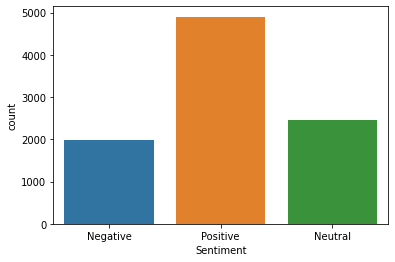

In [8]:
import seaborn as sns
sns.countplot(vader['Sentiment'])


In [9]:

temp = vader.groupby('Sentiment').count()['date'].reset_index().sort_values(by='date',ascending=False)
temp.style.background_gradient(cmap='Greens')

,Sentiment,date
2,Positive,4903
1,Neutral,2463
0,Negative,1992


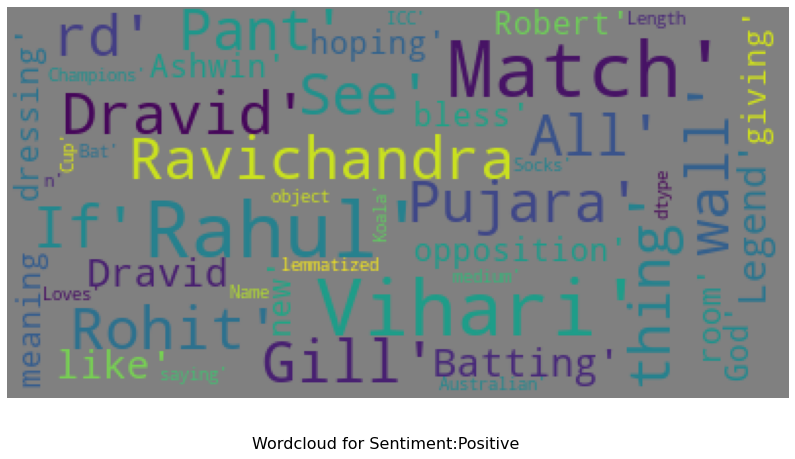

In [11]:
from wordcloud import WordCloud
def build_wordcloud(vader, title):
    wordcloud = WordCloud(
        background_color='gray',
        max_words=50, 
        max_font_size=40, 
        random_state=666
    ).generate(str(vader))

    fig = plt.figure(1, figsize=(14,14))
    plt.axis('off')
    fig.suptitle(title, fontsize=16)
    fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
build_wordcloud(vader[vader['Sentiment'] == 'Positive']['lemmatized'], 'Wordcloud for Sentiment:Positive')

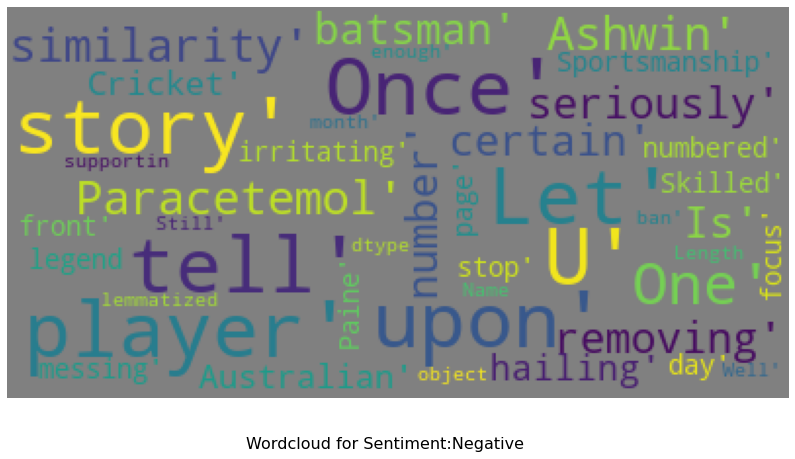

In [12]:
build_wordcloud(vader[vader['Sentiment'] == 'Negative']['lemmatized'], 'Wordcloud for Sentiment:Negative')

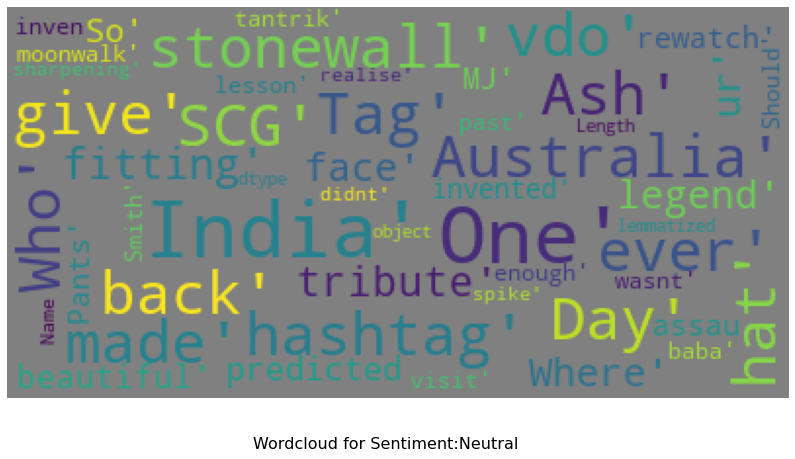

In [13]:
build_wordcloud(vader[vader['Sentiment'] == 'Neutral']['lemmatized'], 'Wordcloud for Sentiment:Neutral')

In [14]:

mean_col = vader.groupby(['date'])['compound'].mean() # don't reset the index!
vader = vader.set_index(['date']) # make the same index here
vader['mean_col'] = mean_col
vader = vader.reset_index()

From the data, it looks like fan moral was at its peak on 20th and 19th January. When India defeated Australia in one of the most historic win. Average sentiment was fairly positive over the course of ten days.


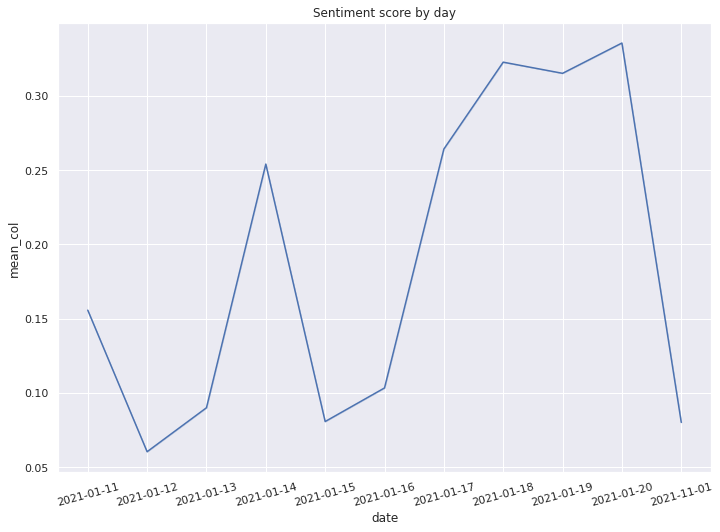

In [19]:
sns.lineplot(x="date", y="mean_col", data=vader)
plt.xticks(rotation=15)
sns.set(rc={'figure.figsize':(20,8.27)})
plt.title('Sentiment score by day')
plt.show()

In [ ]:
vader.to_csv(r'C:\Users\91987\Desktop\Twitter Sentiment Analysis\File Name.csv', index = False)